In [1]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #model evaluation

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv


%matplotlib inline

In [2]:
# Data
m = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/Music_data.csv")

m.head()

,Unnamed: 0,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,duration_ms,track_name
0,1,Jonas Brothers,0.594,0.464,0,-7.898,1,0.0340,0.306000,0.000000,0.1870,0.545,193866,Please Be Mine
1,2,Jonas Brothers,0.582,0.697,7,-3.842,1,0.0695,0.000745,0.000000,0.1850,0.701,153346,S.O.S.
2,3,Jonas Brothers,0.442,0.961,1,-2.914,1,0.0928,0.000035,0.000036,0.0619,0.405,168480,Mandy
3,4,Jonas Brothers,0.659,0.857,11,-5.850,1,0.0437,0.004500,0.000002,0.3350,0.798,201960,Year 3000
4,5,Jonas Brothers,0.468,0.893,11,-3.554,1,0.1300,0.003890,0.000000,0.3670,0.810,164973,Hold On


In [3]:
# shape
m.shape

(2553, 14)

# Train Test Split

In [4]:
# Split Data
predictors = ["energy", "key", "loudness", "mode", "speechiness", "acousticness",
              "instrumentalness", "liveness", "valence", "duration_ms"]

X_train, X_test, y_train, y_test = train_test_split(m[predictors],m["danceability"], test_size = 0.2)

In [6]:
# size of train and test
print(X_train.shape)
print(X_test.shape)

X_train.head()

(2042, 10)
(511, 10)


,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,duration_ms
1752,0.754,4,-3.982,1,0.0428,0.45100,0.0,0.223,0.790,238693
2471,0.631,0,-5.886,1,0.2630,0.04580,0.0,0.130,0.369,233706
76,0.836,2,-4.073,1,0.0478,0.00369,0.0,0.108,0.602,169333
1767,0.560,0,-7.392,1,0.0279,0.46900,0.0,0.087,0.228,239346
2024,0.791,5,-3.010,1,0.0309,0.04310,0.0,0.159,0.358,262920


In [7]:
# create and fit
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
# predictions
y_pred = model.predict(X_test)

In [14]:
#testing R2
model.score(X_test, y_test)

0.30594831269341394

In [15]:
#training R2
model.score(X_train, y_train)

0.3727429529312335

In [16]:
# true vs. pred
true_vs_pred = pd.DataFrame({"predicted": y_pred, 
                            "true": y_test})

true_vs_pred

,predicted,true
704,0.592932,0.602
621,0.713220,0.623
1874,0.678621,0.755
2170,0.558893,0.541
1687,0.649818,0.800
...,...,...
1609,0.742036,0.826
609,0.499051,0.336
1317,0.613745,0.691
1402,0.536478,0.596


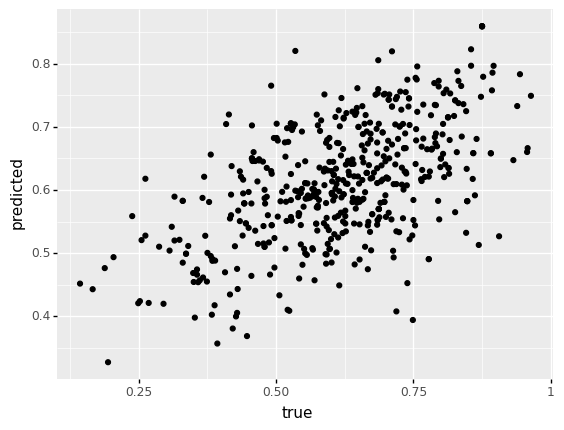

<ggplot: (-9223372036520312418)>

In [17]:
# plot
(ggplot(true_vs_pred, aes(x = "true", y = "predicted")) + geom_point())

# K Fold

In [18]:
# kf
kf = KFold(n_splits = 10, shuffle = True)

In [19]:
# set up
X = m[predictors]
y = m["danceability"]

mse = []
r2 = []

lr = LinearRegression()

In [20]:
# loop

for train, test in kf.split(X):
    X_train = X.iloc[train]
    X_test  = X.iloc[test]
    y_train = y[train]
    y_test  = y[test]
    
    # model
    lr.fit(X_train, y_train)
    
    # metrics
    mse.append(mean_squared_error(y_test, lr.predict(X_test)))
    r2.append(r2_score(y_test, lr.predict(X_test)))
    

In [21]:
# mse
mse

[0.01701435222248067,
 0.016176244574289685,
 0.01649042791730348,
 0.01745577443368145,
 0.013731356009763567,
 0.0159065517631108,
 0.0165891692810537,
 0.016195037494384258,
 0.01486383231975921,
 0.013480677178226734]

In [22]:
# mean mse
np.mean(mse)

0.015790342319405355

In [23]:
# r2
r2

[0.3733556036786616,
 0.34942133564176914,
 0.3967056647616126,
 0.3765149293047986,
 0.3040186213610878,
 0.3516652429474775,
 0.3375517799888147,
 0.24567467740544435,
 0.39788871036243434,
 0.3474395448101071]

In [24]:
# mean r2

np.mean(r2)

0.3480236110262208

# Leave One Out

In [25]:
# loo set up
loo = LeaveOneOut()

mse = []

lr = LinearRegression()

In [26]:
# loo loop

for train, test in loo.split(X):
    X_train = X.iloc[train]
    X_test  = X.iloc[test]
    y_train = y[train]
    y_test  = y[test]
    
    # model
    lr.fit(X_train, y_train)
    
    # metrics
    mse.append(mean_squared_error(y_test, lr.predict(X_test)))

In [28]:
# mean mse
np.mean(mse)

0.01577326185227478

# Always Get the Same Split!
When you do KFold or TTS, you may get slightly different splits every time you run the function, even with the same data! This is because the data is split randomly. 

If you want the same split every time, use the `random_state` argument.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(m[predictors],
                                                m["danceability"],
                                                test_size=0.2,
                                                random_state = 42)
kf = KFold(n_splits = 10, shuffle = True, random_state = 42) #we'll talk more about this later...

# Quick Note about Data Leakage...

In [30]:
# Say you want to standardize...
# Split Data
predictors = ["energy", "key", "loudness", "mode", "speechiness", "acousticness",
              "instrumentalness", "liveness", "valence", "duration_ms"]
contin = ["energy", "loudness", "speechiness", "acousticness",
              "instrumentalness", "liveness", "valence", "duration_ms"]

X = m[predictors]
y = m["danceability"]


# tts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
# z
z = StandardScaler()

z.fit(X_train[contin])
Xz_train = z.transform(X_train[contin])
Xz_test = z.transform(X_test[contin])

Xz_train

array([[-1.00470833, -0.03753225, -0.55161617, ..., -0.88123003,
        -1.20359262, -0.23182332],
       [-0.12478813,  0.27343227, -0.43932514, ..., -0.2478556 ,
         1.09062338,  0.39964525],
       [ 0.59956607,  0.82545232, -0.21736671, ..., -0.750891  ,
         1.5786574 ,  1.0125593 ],
       ...,
       [ 1.52323921,  0.92291882,  0.69617852, ...,  0.6681818 ,
         0.36997501, -0.19590049],
       [ 0.34190988, -0.0259291 , -0.42515759, ..., -0.87756588,
        -1.49550082,  0.94058184],
       [-0.02269794,  0.13129364, -0.47867948, ..., -0.62264576,
         0.84432584, -0.67487643]])

In [33]:
# in KF

X = m[predictors]
y = m["danceability"]

lr = LinearRegression()

kf = KFold(n_splits = 5, shuffle = True)

mse = []
mse_train = []
r2 = []

for train, test in kf.split(X):
    X_train = X.iloc[train]
    X_test  = X.iloc[test]
    y_train = y[train]
    y_test  = y[test]
    
    # z
    z = StandardScaler()
    
    z.fit(X_train[contin])
    
    X_train[contin] = z.transform(X_train[contin])
    X_test[contin] = z.transform(X_test[contin])
    
    # model
    lr.fit(X_train, y_train)
    
    # metrics
    mse.append(mean_squared_error(y_test, lr.predict(X_test)))
    mse_train.append(mean_squared_error(y_train, lr.predict(X_train)))
    
    r2.append(r2_score(y_test, lr.predict(X_test)))
    

In [34]:
np.mean(mse)


0.01577361552493547

In [35]:
np.mean(mse_train)

0.01559909421398574

In [36]:
np.mean(r2)

0.35149628945488426